# Market Basket Analysis - Telecom Company

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mlxtend
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from pandas.plotting import parallel_coordinates

In [36]:
# Reading in the data and analyzing only the churned customers
data = pd.read_csv("C:\\Users\Owner\Desktop\School\Data Mining II D212\Task 3\churn_clean.csv")

# Getting only the columns that are products/services
data = data[['Contract','InternetService','Phone','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']]

data.head()

,Contract,InternetService,Phone,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,One year,Fiber Optic,Yes,Yes,Yes,No,No,No,Yes
1,Month-to-month,Fiber Optic,Yes,Yes,No,No,No,Yes,Yes
2,Two Year,DSL,Yes,No,No,No,No,No,Yes
3,Two Year,DSL,Yes,Yes,No,No,No,Yes,No
4,Month-to-month,Fiber Optic,No,No,No,No,Yes,Yes,No


In [37]:
# Creating dummies so that all possible associations can be considered
data = pd.get_dummies(data,drop_first = True)
data.head()

,Contract_One year,Contract_Two Year,InternetService_Fiber Optic,InternetService_None,Phone_Yes,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes
0,1,0,1,0,1,1,1,0,0,0,1
1,0,0,1,0,1,1,0,0,0,1,1
2,0,1,0,0,1,0,0,0,0,0,1
3,0,1,0,0,1,1,0,0,0,1,0
4,0,0,1,0,0,0,0,0,1,1,0


In [38]:
# Changing 0s and 1s to False and True
data.replace(0, False, inplace=True)
data.replace(1, True, inplace=True)
data.head()

,Contract_One year,Contract_Two Year,InternetService_Fiber Optic,InternetService_None,Phone_Yes,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes
0,True,False,True,False,True,True,True,False,False,False,True
1,False,False,True,False,True,True,False,False,False,True,True
2,False,True,False,False,True,False,False,False,False,False,True
3,False,True,False,False,True,True,False,False,False,True,False
4,False,False,True,False,False,False,False,False,True,True,False


### Analysis
Calc support (# of trans with items) / (# of total trans)

In [39]:
# Compute the support
support = data.mean()
support = pd.DataFrame(support, columns=['support']).sort_values('support',ascending=False)

# Print the support
support

,support
Phone_Yes,0.9067
StreamingTV_Yes,0.4929
StreamingMovies_Yes,0.4890
OnlineBackup_Yes,0.4506
InternetService_Fiber Optic,0.4408
DeviceProtection_Yes,0.4386
TechSupport_Yes,0.3750
OnlineSecurity_Yes,0.3576
Contract_Two Year,0.2442
InternetService_None,0.2129


The most frequent service used by far was Phone service (used by 90% of all customers). The goal was to look for other opportunities for cross selling or promotion. Phone will be dropped so that other item relationships can be analyzed without noise. The streaming services seems to be popular as well with the services being present in nearly half of all customer plans.

In [40]:
# Drop Phone
data = data.drop('Phone_Yes', axis=1)

In [41]:
# Writing the final dataset that will be used to an excel file
data.to_excel("C:\\Users\Owner\Desktop\School\Data Mining II D212\Task 3\copy_of_the_cleaned_data_set.xlsx")

The Apriori Algorithm is a good method of finding the most important associations for a task. The method finds rules without needing to compute every possible combination. <br><br>
The principle of the method is retain frequent item sets. For example, if Phone services was not frequent any additional rules with it will not be retained like (Phone, TV) or (Phone, TV, Movies).<br><br>
The goal with Apriori in the next step will be to come up with a list of rules with a max of 3 of items and a small value for support

In [42]:
# Compute frequent itemsets using the Apriori algorithm
frequent_itemsets1 = apriori(data, 
                            min_support = 0.05, 
                            use_colnames = True)

frequent_itemsets2 = apriori(data, 
                            min_support = 0.01, 
                            use_colnames = True)

# Print a preview of the frequent itemsets
print(frequent_itemsets2.sort_values('support',ascending=False))

print(len(frequent_itemsets1), len(frequent_itemsets2))

     support                                           itemsets
8     0.4929                                  (StreamingTV_Yes)
9     0.4890                              (StreamingMovies_Yes)
5     0.4506                                 (OnlineBackup_Yes)
2     0.4408                      (InternetService_Fiber Optic)
6     0.4386                             (DeviceProtection_Yes)
..       ...                                                ...
211   0.0104  (Contract_Two Year, InternetService_None, Stre...
293   0.0103  (DeviceProtection_Yes, StreamingTV_Yes, Intern...
215   0.0103  (StreamingMovies_Yes, Contract_Two Year, Inter...
173   0.0102  (StreamingMovies_Yes, Contract_One year, Inter...
296   0.0101  (DeviceProtection_Yes, Contract_Two Year, Stre...

[323 rows x 2 columns]
94 323


Next the itemsets will be filtered for lift > 1 as to find significant rules that aren't occuring by random chance

In [43]:
# Compute all association rules for frequent_itemsets
rules = association_rules(frequent_itemsets2, 
                            metric = "lift", 
                            min_threshold = 1.0)

# Print association rules
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Contract_One year),(InternetService_None),0.2102,0.2129,0.0471,0.224072,1.052477,0.002348,1.014399
1,(InternetService_None),(Contract_One year),0.2129,0.2102,0.0471,0.221231,1.052477,0.002348,1.014164
2,(DeviceProtection_Yes),(Contract_One year),0.4386,0.2102,0.0937,0.213634,1.016338,0.001506,1.004367
3,(Contract_One year),(DeviceProtection_Yes),0.2102,0.4386,0.0937,0.445766,1.016338,0.001506,1.012929
4,(Contract_One year),(StreamingTV_Yes),0.2102,0.4929,0.1081,0.514272,1.043360,0.004492,1.044000
...,...,...,...,...,...,...,...,...,...
1783,"(OnlineSecurity_Yes, StreamingTV_Yes)","(DeviceProtection_Yes, StreamingMovies_Yes, Te...",0.1766,0.0790,0.0147,0.083239,1.053658,0.000749,1.004624
1784,"(StreamingMovies_Yes, OnlineSecurity_Yes)","(DeviceProtection_Yes, TechSupport_Yes, Stream...",0.1774,0.0802,0.0147,0.082864,1.033212,0.000473,1.002904
1785,(DeviceProtection_Yes),"(StreamingMovies_Yes, OnlineSecurity_Yes, Tech...",0.4386,0.0321,0.0147,0.033516,1.044104,0.000621,1.001465
1786,(OnlineSecurity_Yes),"(DeviceProtection_Yes, StreamingMovies_Yes, Te...",0.3576,0.0386,0.0147,0.041107,1.064958,0.000897,1.002615


There are 144 rules with significant lifts > 1. Now filtering rules using multiple metrics

In [44]:
# Recover association rules using a minium support threshold of 0.15
rules = association_rules(frequent_itemsets2, metric = 'support', min_threshold = 0.15)

# Apply a 0.4 antecedent & consequent support threshold, 0.495 confidence threshold, and 1.00 lift threshold
filtered_rules = rules[(rules['antecedent support'] > 0.4) &
                       (rules['consequent support'] > 0.4) &
                       (rules['confidence'] > 0.495) &
                       (rules['lift'] > 1.00)]

# Print remaining rule
filtered_rules[['antecedents','consequents']]

,antecedents,consequents
33,(DeviceProtection_Yes),(StreamingMovies_Yes)


A strict pruning resulted in a list of 4 rules that are interesting. The next steps will use visuals to determine if the rules were pruned too much.

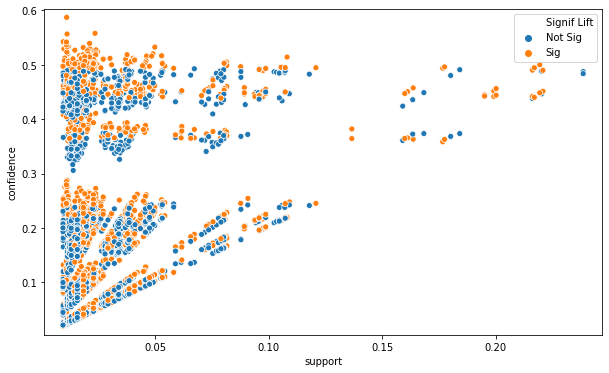

In [45]:
## Apply the Apriori algorithm with a support value of 0.0095
frequent_itemsets = apriori(data, min_support = 0.0095, 
                            use_colnames = True)

# Generate association rules without performing additional pruning
rules = association_rules(frequent_itemsets, metric='support', 
                          min_threshold = 0.0)

# Creating labels to color rules with lifts > 1
def f(row):
    if row['lift'] > 1:
        val = 'Sig'
    else:
        val = 'Not Sig'
    return val

rules['Signif Lift'] = rules.apply(f, axis=1)

# Generate scatterplot using support and confidence
plt.figure(figsize=(10,6))
sns.scatterplot(x = "support", y = "confidence", data = rules, hue = "Signif Lift")
plt.margins(0.01,0.01)
plt.show()

This shows that the strict support thresholds used for filtering earlier were removing rules that would be considered strong by other metrics

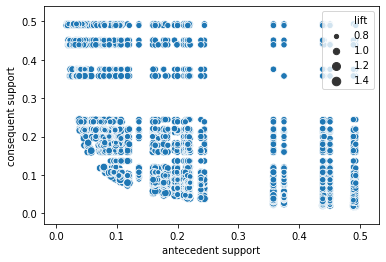

In [46]:
sns.scatterplot(x = "antecedent support", y = "consequent support", data = rules, size = "lift")

In [47]:
## Apply the Apriori algorithm with support > 15%
frequent_itemsets = apriori(data, min_support = 0.15, 
                            use_colnames = True)

# Generate association rules with confidence > 40%
rules = association_rules(frequent_itemsets, metric='confidence', 
                          min_threshold = 0.40)

# Apply a filter for lift > 1

filtered_rules = rules[rules['lift'] > 1]

Adding the Zhang value to each rule

In [48]:
# Funtion to compute Zhang's rule from mlxtend association_rules output
def zhangs_rule(rules):
    PAB = rules['support'].copy()
    PA = rules['antecedent support'].copy()
    PB = rules['consequent support'].copy()
    NUMERATOR = PAB - PA*PB
    DENOMINATOR = np.max((PAB*(1-PA).values,PA*(PB-PAB).values), axis = 0)
    return NUMERATOR / DENOMINATOR

filtered_rules['zhang'] = zhangs_rule(filtered_rules)

filtered_rules.sort_values('confidence',ascending=False)

C:\Users\Owner\anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhang
25,(DeviceProtection_Yes),(StreamingMovies_Yes),0.4386,0.4890,0.2193,0.500000,1.022495,0.004825,1.022000,0.039188
13,(OnlineSecurity_Yes),(StreamingMovies_Yes),0.3576,0.4890,0.1774,0.496085,1.014489,0.002534,1.014060,0.022232
22,(DeviceProtection_Yes),(StreamingTV_Yes),0.4386,0.4929,0.2169,0.494528,1.003303,0.000714,1.003221,0.005864
12,(OnlineSecurity_Yes),(StreamingTV_Yes),0.3576,0.4929,0.1766,0.493848,1.001923,0.000339,1.001873,0.002988
9,(InternetService_Fiber Optic),(StreamingMovies_Yes),0.4408,0.4890,0.2161,0.490245,1.002546,0.000549,1.002442,0.004541
20,(OnlineBackup_Yes),(StreamingMovies_Yes),0.4506,0.4890,0.2207,0.489791,1.001618,0.000357,1.001551,0.002941
10,(OnlineSecurity_Yes),(OnlineBackup_Yes),0.3576,0.4506,0.1636,0.457494,1.015301,0.002465,1.012708,0.023459
14,(DeviceProtection_Yes),(OnlineBackup_Yes),0.4386,0.4506,0.2001,0.456224,1.012482,0.002467,1.010343,0.021959
2,(InternetService_Fiber Optic),(OnlineBackup_Yes),0.4408,0.4506,0.1991,0.451679,1.002394,0.000476,1.001967,0.004271
19,(StreamingMovies_Yes),(OnlineBackup_Yes),0.4890,0.4506,0.2207,0.451329,1.001618,0.000357,1.001329,0.003162


All the Zhangs were positive indicating there are no dissociations present in the rule set. Plotting the final rules

In [49]:
# Function to convert rules to coordinates.
def rules_to_coordinates(rules):
    rules['antecedent'] = rules['antecedents'].apply(lambda antecedent: list(antecedent)[0])
    rules['consequent'] = rules['consequents'].apply(lambda consequent: list(consequent)[0])
    rules['rule'] = rules.index
    return rules[['antecedent','consequent','rule']]

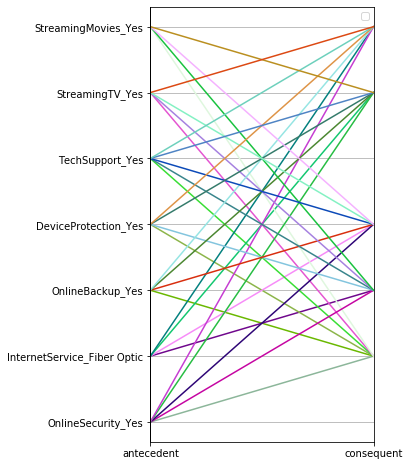

In [50]:
# Convert rules into coordinates suitable for use in a parallel coordinates plot
coords = rules_to_coordinates(rules)

# Generate parallel coordinates plot
plt.figure(figsize=(4,8))
parallel_coordinates(coords, 'rule')
plt.legend([])
plt.grid(True)
plt.show()

Streaming services and Online backup are consequents for many of the final rules

In [51]:
# Top 3 rules
filtered_rules.sort_values('confidence',ascending=False).head(3)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhang
25,(DeviceProtection_Yes),(StreamingMovies_Yes),0.4386,0.4890,0.2193,0.500000,1.022495,0.004825,1.022000,0.039188
13,(OnlineSecurity_Yes),(StreamingMovies_Yes),0.3576,0.4890,0.1774,0.496085,1.014489,0.002534,1.014060,0.022232
22,(DeviceProtection_Yes),(StreamingTV_Yes),0.4386,0.4929,0.2169,0.494528,1.003303,0.000714,1.003221,0.005864
